## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm, lognorm, uniform

import warnings
# warnings.filterwarnings('ignore')

In [2]:
print("Yfinance version: " , yf.__version__)

Yfinance version:  0.2.37


In [3]:
# Set default parameters for plt.title()
plt.rcParams['axes.titlepad'] = 12  # Set padding around the title
plt.rcParams['axes.titleweight'] = 'normal'  # Set title font size
plt.rcParams['axes.titlesize'] = 9  # Set title font size

## Fetch data

In [4]:
def fetch_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval=interval)
    return data

In [5]:
# select tickers
tickers = ["GOOG", "AMZN", "MSFT", "META"] #, "BRK-B", "IAU", "GOOG", "AMZN", "AAPL", "TSM", "BAC", "WFC"]  #VALE, KO, JNJ, DG, DIS, SPY 

# date format YYYY-MM-DD
start_date = "2010-01-01"
end_date = "2024-02-01"

# time interval to take the cotations, in this case monthly
interval= "1d"

stock_data = fetch_stock_data(tickers, start_date, end_date, interval)

display(stock_data)

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                           Close  \
Ticker            AMZN        GOOG        META        MSFT        AMZN   
Date                                                                     
2010-01-04    6.695000   15.610239         NaN   23.431595    6.695000   
2010-01-05    6.734500   15.541497         NaN   23.439159    6.734500   
2010-01-06    6.612500   15.149715         NaN   23.295309    6.612500   
2010-01-07    6.500000   14.797037         NaN   23.053049    6.500000   
2010-01-08    6.676000   14.994298         NaN   23.212036    6.676000   
...                ...         ...         ...         ...         ...   
2024-01-25  157.750000  153.639999  392.763275  404.122681  157.750000   
2024-01-26  159.119995  153.789993  393.722260  403.184418  159.119995   
2024-01-29  161.259995  154.839996  400.594940  408.963715  161.259995   
2024-01-30  159.000000  153.050003  399.635986  407.835815  159.000000   
2024-01-31  155.199997  141.800003  389.726501  396.846130  155.199997   

Price                                                 High              ...  \
Ticker            GOOG        META        MSFT        AMZN        GOOG  ...   
Date                                                                    ...   
2010-01-04   15.610239         NaN   30.950001    6.830500   15.678981  ...   
2010-01-05   15.541497         NaN   30.959999    6.774000   15.637387  ...   
2010-01-06   15.149715         NaN   30.770000    6.736500   15.588072  ...   
2010-01-07   14.797037         NaN   30.450001    6.616000   15.193053  ...   
2010-01-08   14.994298         NaN   30.660000    6.684000   15.024933  ...   
...                ...         ...         ...         ...         ...  ...   
2024-01-25  153.639999  393.179993  404.869995  158.509995  154.759995  ...   
2024-01-26  153.789993  394.140015  403.929993  160.720001  154.110001  ...   
2024-01-29  154.839996  401.019989  409.720001  161.289993  155.199997  ...   
2024-01-30  153.050003  400.059998  408.589996  161.729996  155.039993  ...   
2024-01-31  141.800003  390.140015  397.579987  159.009995  145.589996  ...   

Price              Low                    Open                          \
Ticker            META        MSFT        AMZN        GOOG        META   
Date                                                                     
2010-01-04         NaN   30.590000    6.812500   15.615220         NaN   
2010-01-05         NaN   30.639999    6.671500   15.620949         NaN   
2010-01-06         NaN   30.520000    6.730000   15.588072         NaN   
2010-01-07         NaN   30.190001    6.600500   15.178109         NaN   
2010-01-08         NaN   30.240000    6.528000   14.744733         NaN   
...                ...         ...         ...         ...         ...   
2024-01-25  385.660004  402.529999  156.949997  151.740005  390.170013   
2024-01-26  391.589996  402.429993  158.419998  152.869995  394.350006   
2024-01-29  393.100006  404.329987  159.339996  153.639999  394.989990   
2024-01-30  399.570007  406.450012  160.699997  154.009995  403.589996   
2024-01-31  387.100006  397.209991  157.000000  145.389999  389.000000   

Price                      Volume                                   
Ticker            MSFT       AMZN       GOOG        META      MSFT  
Date                                                                
2010-01-04   30.620001  151998000   78541293         NaN  38409100  
2010-01-05   30.850000  177038000  120638494         NaN  49749600  
2010-01-06   30.879999  143576000  159744526         NaN  58182400  
2010-01-07   30.629999  220604000  257533695         NaN  50559700  
2010-01-08   30.280001  196610000  189680313         NaN  51197400  
...                ...        ...        ...         ...       ...  
2024-01-25  404.320007   43638600   21495100  15091100.0  21021200  
2024-01-26  404.369995   51047400   19494500  13163700.0  17803300  
2024-01-29  406.059998   45270400   20909300  18742400.0  24

In [6]:
# select only the closing price
df_close = stock_data.Close.copy()
# df_close.info()
df_close.head(3)

Ticker,AMZN,GOOG,META,MSFT
Date,,,,
2010-01-04,6.6950,15.610239,NaN,30.950001
2010-01-05,6.7345,15.541497,NaN,30.959999
2010-01-06,6.6125,15.149715,NaN,30.770000


In [7]:
# find the 
df_daily_return = (df_close
                   .copy()
                   .pct_change(periods=1)
                   .dropna()
)

# display(cov_yoy.describe())
df_daily_return.head(3)

Ticker,AMZN,GOOG,META,MSFT
Date,,,,
2012-05-21,0.019921,0.022835,-0.109861,0.016399
2012-05-22,-0.012746,-0.021674,-0.089039,0.000336
2012-05-23,0.009056,0.014414,0.032258,-0.021841


## Covariance

### Calculation (YoY)

In [8]:
# find the 
cov_yoy = (df_close
             .copy()
             .pct_change(periods=1)
             .dropna()
             .rolling(window=252)
             .cov()
             .dropna()
             .apply(lambda x: 252 * x)
)

# display(cov_yoy.describe())
cov_yoy

Ticker                 AMZN      GOOG      META      MSFT
Date       Ticker                                        
2013-05-22 AMZN    0.076734  0.022707  0.011182  0.020326
           GOOG    0.022707  0.045191  0.007205  0.018177
           META    0.011182  0.007205  0.302401  0.002140
           MSFT    0.020326  0.018177  0.002140  0.043017
2013-05-23 AMZN    0.076400  0.022351  0.013278  0.020101
...                     ...       ...       ...       ...
2024-01-30 MSFT    0.043180  0.035750  0.052678  0.056846
2024-01-31 AMZN    0.100898  0.058659  0.074353  0.043487
           GOOG    0.058659  0.092002  0.072361  0.037240
           META    0.074353  0.072361  0.153828  0.052677
           MSFT    0.043487  0.037240  0.052677  0.057112

[10768 rows x 4 columns]

In [9]:
cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,AMZN,GOOG,META,MSFT
Date,Ticker,,,,
2013-05-22,GOOG,0.022707,0.045191,0.007205,0.018177
2013-05-23,GOOG,0.022351,0.044820,0.009558,0.017969
2013-05-24,GOOG,0.022046,0.044430,0.007857,0.017927


In [10]:
cov11 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
cov12 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# cov21 = cov12
cov22 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

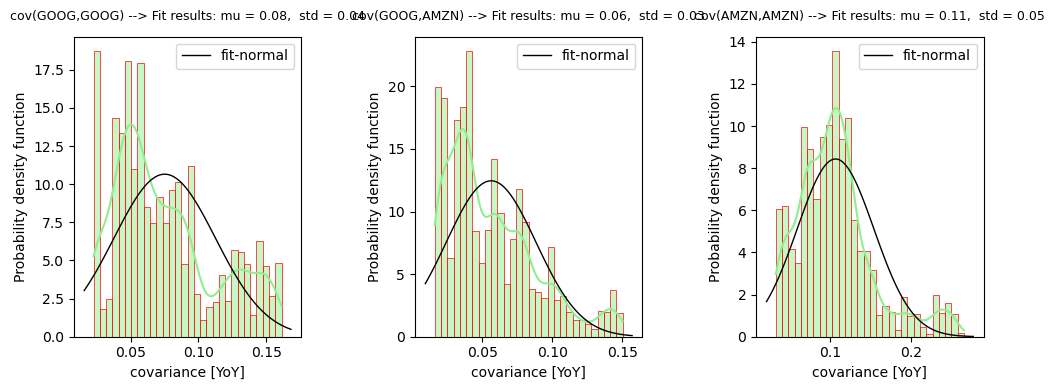

In [11]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 1)
mu, std = norm.fit(cov11)
sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(cov12)
sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 3)
mu, std = norm.fit(cov22)
sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

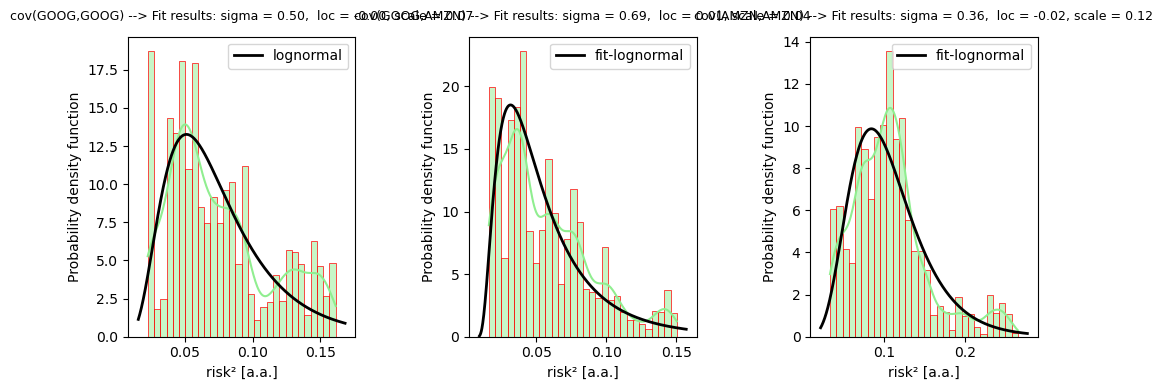

In [12]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 1)
sigma, loc, scale = lognorm.fit(cov11)

sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()


# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(cov12)

sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 3)
sigma, loc, scale = lognorm.fit(cov22)

sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Correlation

### Calculation (YoY)

In [13]:
# find the covelation yoy
corr_yoy = (df_close
            .copy()
            .pct_change(periods=1)
            .dropna()
            .rolling(window=252)
            .corr()
            .dropna()
            # .apply(lambda x: x + 1.0)
)

# display(cov_yoy.describe())
corr_yoy

Ticker                 AMZN      GOOG      META      MSFT
Date       Ticker                                        
2013-05-22 AMZN    1.000000  0.385607  0.073409  0.353780
           GOOG    0.385607  1.000000  0.061634  0.412266
           META    0.073409  0.061634  1.000000  0.018759
           MSFT    0.353780  0.412266  0.018759  1.000000
2013-05-23 AMZN    1.000000  0.381948  0.089132  0.350842
...                     ...       ...       ...       ...
2024-01-30 MSFT    0.571077  0.507860  0.562618  1.000000
2024-01-31 AMZN    1.000000  0.608826  0.596814  0.572868
           GOOG    0.608826  1.000000  0.608263  0.513741
           META    0.596814  0.608263  1.000000  0.562004
           MSFT    0.572868  0.513741  0.562004  1.000000

[10768 rows x 4 columns]

In [14]:
corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,AMZN,GOOG,META,MSFT
Date,Ticker,,,,
2013-05-22,GOOG,0.385607,1.0,0.061634,0.412266
2013-05-23,GOOG,0.381948,1.0,0.083771,0.409475
2013-05-24,GOOG,0.378860,1.0,0.070009,0.410257


In [15]:
corr11 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
corr12 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# corr21 = corr12
corr22 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

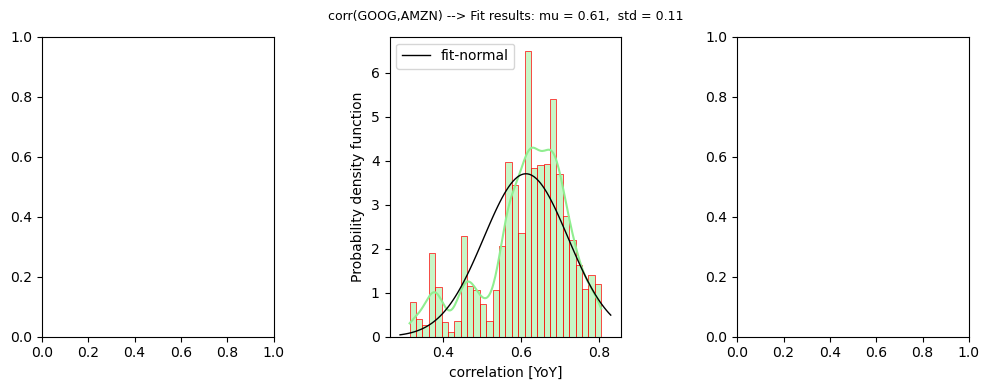

In [16]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 1)
# mu, std = norm.fit(corr11)
# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(corr12)
sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 3)
# mu, std = norm.fit(corr22)
# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

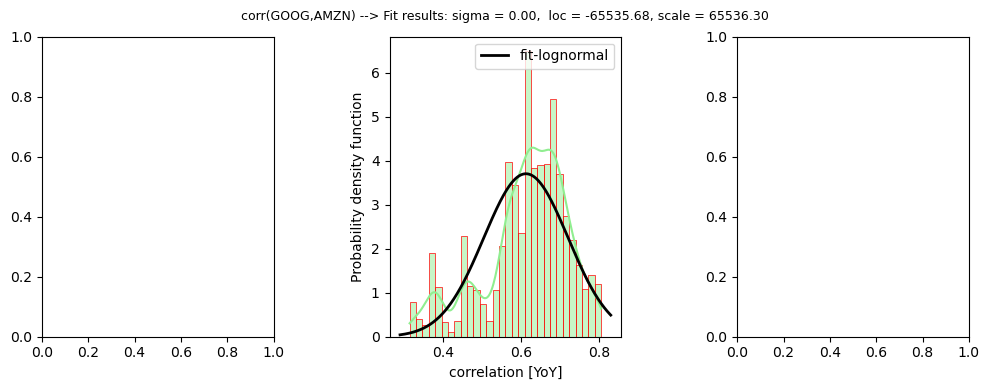

In [17]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 1)
# sigma, loc, scale = lognorm.fit(corr11)

# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()


# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(corr12)

sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 3)
# sigma, loc, scale = lognorm.fit(corr22)

# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Monte carlo simulation

### Equations:
<br>

- **Portfolio Return**:
<br>
$$ \large R_P = {\omega}^T \cdot R $$
<br>
with $R_P$ being the return of the portfolio, $\omega$ the weights and $R$ the returns of the assets. Each one are given by:
<br><br>

<table>
  <tr>
    <td>
      $$
        \large{\omega} = \small \begin{bmatrix}
                {\omega}_A \\
                {\omega}_B \\
                {\omega}_C \\
        \end{bmatrix},
      $$
    </td>
    <td>
      and
    </td>
    <td>
    $$
        \large{R} = \small \begin{bmatrix}
                R_A \\
                R_B \\
                R_C \\
        \end{bmatrix}.
    $$
    </td>
  </tr>
</table>

<br>

- **Portfolio Risk**: 
<br>
$$ \large{{\sigma}^2_P} = {\omega}^T \cdot \Sigma \cdot \omega $$
<br>
in wich ${{\sigma}^2_P}$ is the variance of the portfolio and $\Sigma$ is the covariance matrix of the assets. The covariance matrix is given by:
<br>
<br>
$$ \large{\Sigma} = \small \begin{bmatrix}
                {{\sigma}^2_A} & cov(A,B) & cov(A,C) \\
                cov(A,B) & {{\sigma}^2_B} & cov(B,C) \\
                cov(A,C) & cov(B,C) & {{\sigma}^2_C} \\
            \end{bmatrix}.
$$
<br>
<br>
The weight matrix ${\omega}$ have dimensios of $({n}_{stocks}, {n}_{samples})$, with ${n}_{stocks}$ being the number of stocks in the portfolio and ${n}_{samples}$ the number of samples for data simulation. So, the weight matrix is defined as:
<br>
<br>
$$ \large{\omega} = \small \begin{bmatrix}
                                {{\omega}^{(1)}_1} & {{\omega}^{(1)}_2} & {{\omega}^{(1)}_3} & \cdot \cdot \cdot & {{\omega}^{(1)}_{n_{samples}}} \\
                                {{\omega}^{(2)}_1} & {{\omega}^{(2)}_2} & {{\omega}^{(2)}_3} & \cdot \cdot \cdot & {{\omega}^{(2)}_{n_{samples}}} \\
                                {{\omega}^{(3)}_1} & {{\omega}^{(3)}_2} & {{\omega}^{(3)}_3} & \cdot \cdot \cdot & {{\omega}^{(3)}_{n_{samples}}} \\
                                \cdot              &      \cdot         &         \cdot      &         \cdot     &            \cdot                \\
                                {{\omega}^{(n_{stocks})}_1} & {{\omega}^{(n_{stocks})}_2} & {{\omega}^{(n_{stocks})}_3} & \cdot \cdot \cdot & {{\omega}^{(n_{stocks})}_{n_{samples}}} \\
                    \end{bmatrix}.
$$
<br>


## Generate samples from distributions models - Covariance

#### Cov pairs

In [18]:
# Number of samples
num_samples = 1_000

In [19]:
# Generate all pairs of assets for covariance matrix
def generate_cov_pairs():    
    ticker_pairs1 = [(tickers[i], tickers[j]) for i in range(len(tickers)) for j in range(i, len(tickers))]
    ticker_pairs2 = [(j,i) for i,j in ticker_pairs1]
    pairs = set(ticker_pairs1).union(set(ticker_pairs2))
    
    ticker_map = dict(zip(tickers, range(0, len(tickers))))
    
    return pairs, ticker_map

cov_pairs, ticker_map = generate_cov_pairs()

#### Cov fitting params

In [20]:
# Empty dict to receive the parameters
cov_fitting_params = {}

for i, j in cov_pairs:

    if i == j:
        
        df = (df_daily_return[[i]]
              .copy()
              .rolling(window=252)
              .var()
              .dropna()
              .apply(lambda x: 252 * x)
            )
        
        sigma, loc, scale = lognorm.fit(df)
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}

    else:
        
        df = (df_daily_return[[i,j]]
              .copy()
              .rolling(window=252)
              .cov()
              .dropna()
              .apply(lambda x: 252 * x)
            )
    
        cov_ij = df[(df.index.get_level_values('Ticker') == i)][j]
    
        sigma, loc, scale = lognorm.fit(cov_ij)    
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}
    
# cov_fitting_params


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


#### Cov samples

In [21]:
def calculate_cov_samples(cvp, num_samples=1_000):
    sigma   = cov_fitting_params[cvp]["sigma"]
    loc     = cov_fitting_params[cvp]["loc"]
    scale   = cov_fitting_params[cvp]["scale"]
    samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_samples, random_state=42)
    return samples

In [22]:
# Defining return dict to receive the samples from distributions models builted with their respective parameters
cov_samples_lognormal = { cvp: calculate_cov_samples(cvp, num_samples) for cvp in cov_pairs }

# Reshaping from (num_samples,) --> (num_samples, 1, 1)
cov_samples_reshaped  = { cvp: cov_samples_lognormal[cvp].reshape(num_samples, 1, 1) for cvp in cov_samples_lognormal.keys() }

# Indexes index array to keys with respective samples, ex.: (BRK-B, IAU) --> (0, 1) 
cov_samples_mapped     = {(ticker_map[i], ticker_map[j]): cov_samples_reshaped[(i,j)] for i, j in cov_samples_reshaped.keys() } 


## Build Cov matrix

In [23]:
# Create empty array with the final shape
cov_matrix = np.zeros((num_samples, len(tickers), len(tickers)), dtype=np.float64)

# Map the values in the dictionary to the new array
for (i, j), arr in cov_samples_mapped.items():    
    cov_matrix[:, i, j] = arr[:, 0, 0]


In [24]:
cov_matrix.shape

(1000, 4, 4)

## Generate weights

In [25]:
def make_wight_matrix(n_tickers, n_samples=1000):
    rand_values = uniform.rvs(size= int(n_tickers * n_samples)).reshape((n_tickers, n_samples))
    normalized_values = rand_values / rand_values.sum(axis=0, keepdims=True)
    return normalized_values

# Matrix of the weights
weight_matrix = make_wight_matrix(len(tickers), num_samples)


In [26]:
weight_matrix.shape

(4, 1000)

## Build Risk Matrix

In [27]:
%time risk_total_matrix = np.dot( np.dot( weight_matrix.T, cov_matrix),  weight_matrix)

# Initialize risk_matrix with zeros of shape (num_samples, num_samples)
risk_matrix = np.zeros((num_samples, num_samples))

# Filter only columns with the risks os Markowitz
for i in range(num_samples):
    risk_matrix[:, i] = risk_total_matrix[i, :, i]



CPU times: total: 41.7 s
Wall time: 55.3 s


In [28]:
risk_matrix.shape

(1000, 1000)

In [29]:
# %time a = np.dot( np.dot( weight_matrix.T, cov_matrix),  weight_matrix)

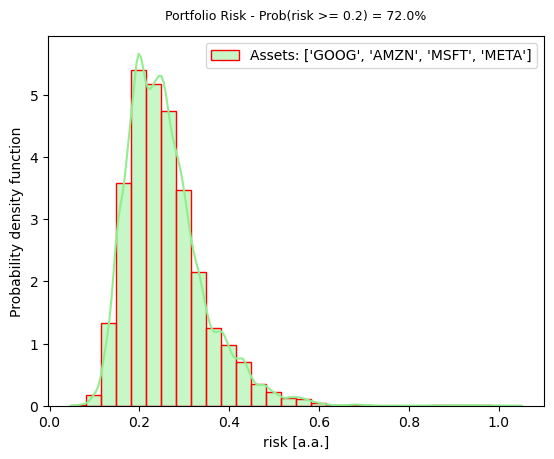

In [30]:
# Fit a Lognormal distribution to the returns_daily (actually, the pricing ratio Pn+12/Pn)
risk_reshaped = risk_matrix.reshape(-1)
data = np.sqrt(risk_reshaped[risk_reshaped >= 0])
# sigma, loc, scale = lognorm.fit(data)

sns.histplot(data= data, bins=50, stat="density", kde=True, color='lightgreen', edgecolor='red', label=f"Assets: {tickers}")
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"Portfolio {tickers} --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
threshold = 0.2
risk_threshold = np.count_nonzero(data > threshold) / np.max(data.shape)

plt.title(f"Portfolio Risk - Prob(risk >= {threshold}) = {int(100 * risk_threshold)}.0%")
plt.ylabel("Probability density function")
plt.xlabel("risk [a.a.]")
plt.legend()
plt.show()

#### Analise results

In [31]:
## MAP the final values to source values in their respective arrays:
# risk_matrix[i, j] == risk_total_matrix[j, i, j]
# risk_total_matrix[j, i, j] == interm_matrix[j, i, :]  *  weight_matrix[:, j]
# interm_matrix[j, i, :] == weight_matrix.T[j, :]  *  cov_matrix[ i, :, :]

In [32]:
# Find the coordinates (indices) of the minimum value
i, j = np.unravel_index(np.argmin(risk_matrix), risk_matrix.shape)

# Print the coordinates
print("Coordinates of the minimum value:", i, j)
print("Minimum value: ", risk_total_matrix[j, i, j])

Coordinates of the minimum value: 262 620
Minimum value:  0.002200497591397292


In [33]:
w_T = weight_matrix.T[j, :].reshape(1, 4)
w_T

array([[0.01324627, 0.04322117, 0.35840803, 0.58512453]])

In [34]:
cov = cov_matrix[ i, :, :].reshape(4, 4)
cov

array([[ 0.01171388,  0.01125299,  0.01086534, -0.00093099],
       [ 0.01125299,  0.01621579,  0.0066812 ,  0.00446313],
       [ 0.01086534,  0.0066812 ,  0.01279047, -0.00382488],
       [-0.00093099,  0.00446313, -0.00382488,  0.00465878]])

In [35]:
int_matrix = w_T.dot(cov)
int_matrix

array([[0.00399101, 0.00585601, 0.00277887, 0.00153567]])

In [36]:
w = weight_matrix[:, j].reshape(4, 1)
w

array([[0.01324627],
       [0.04322117],
       [0.35840803],
       [0.58512453]])

In [37]:
risk_final = int_matrix.dot(w)
risk_final

array([[0.0022005]])